In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
path = 'C:/Users/Vladimir/Desktop/data'
objs = os.walk(path)
names = []
for d in objs:
    for f in d:
        if len(f) > 1:
            names = f


In [58]:
def isfloat(value):
    for i in range(len(value)):
        if (not value[i].isnumeric() and value[i] != ',' and value[i] != '.'):
            return False
    return True
data = []
parameter = []
Country_name = ""
Country_information = []
cntrs = []
for name in names:
    file = open(path+'/'+name, 'r')
    st = [1,2]
    parameter.append(name[:len(name)-4])
    while (len(st) > 1):
        st = file.readline().split()
        if (len(st) > 1):
            i = 0;
            while (st[i] != 'None' and not isfloat(st[i])):
                Country_name += st[i]+' '
                i += 1
            Country_name = Country_name[:-1]
            Country_information.append(Country_name)
            while (i < len(st)):
                if (st[i]  == 'None'):
                    Country_information.append(st[i])
                else:
                    st[i] = st[i].replace(',','')
                    Country_information.append(float(st[i]))
                i += 1
            i = 0
            cntrs.append(np.array(Country_information))
        Country_information.clear()
        Country_name = ""
    parameter.append(np.array(cntrs))
    cntrs = []
    data.append(parameter)
    parameter = []
data.pop()
print(len(data))

13


In [59]:
output = open('html_table.txt', 'w')
output.write('<!DOCTYPE html>\n')
output.write('<html>\n')
output.write('<body>\n')
output.write('<h2>Table for homicide in different countries</h2>\n')
output.write('<table style="width:100%">\n')
index = 5
header = ['Country', '2000', '2005', '2010', '2011', '2012', '2013', '2014']
output.write('<tr>\n')
for elem in header:
    output.write('<th>')
    output.write(elem)
    output.write('</th>\n')
output.write('</tr>\n')
for i in range(len(data[index][1])):
    output.write('<tr>\n')
    for j in range(len(data[index][1][i])):
        output.write('<th>')
        output.write(str(data[index][1][i][j]))
        output.write('</th>\n')
    output.write('</tr>\n')
output.write('</table>\n</body>\n</html>\n')
output.close()

In [60]:
max_values = {}
max_values_rate = {}
for i in range(len(data)):
    if (data[i][0].find('rate') == -1):
        for j in range(len(data[i][1])):
            res = max_values.get(data[i][1][j][0], [-1,-1])
            if (res != [-1,-1]):
                res = True
            else:
                res = False
            if (list(data[i][1][j][-4:]).count('None') == 0):
                if (not res):
                    max_values[data[i][1][j][0]] = np.array(data[i][1][j][-4:], dtype='float32')
                else:
                    max_values[data[i][1][j][0]] = np.array(max_values[data[i][1][j][0]], dtype='float32') + np.array(data[i][1][j][-4:], dtype='float32')
    else:
        for j in range(len(data[i][1])):
            res = max_values_rate.get(data[i][1][j][0], [-1,-1])
            if (res != [-1,-1]):
                res = True
            else:
                res = False
            if (list(data[i][1][j][-4:]).count('None') == 0):
                if (not res):
                    max_values_rate[data[i][1][j][0]] = np.array(data[i][1][j][-4:], dtype='float32')
                else:
                    max_values_rate[data[i][1][j][0]] = np.array(max_values_rate[data[i][1][j][0]], dtype='float32') + np.array(data[i][1][j][-4:], dtype='float32')

C:\Users\Vladimir\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
C:\Users\Vladimir\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  import sys


In [63]:
frequency = {}
top_crime = {}
for i in range(len(data)):
    if (data[i][0].find('rate') == -1):
        for j in range(len(data[i][1])):
            res = frequency.get(data[i][1][j][0], [-1,-1])
            if (res != [-1,-1]):
                res = True
            else:
                res = False
            if (list(data[i][1][j][-4:]).count('None') == 0):
                if (not res):
                    frequency[data[i][1][j][0]] = [[data[i][0], data[i][1][j][-1]], [data[i][0], data[i][1][j][-2]], [data[i][0], data[i][1][j][-3]], [data[i][0],data[i][1][j][-4]]]
                else:
                    for k in range(len(frequency[data[i][1][j][0]])):
                        if (float(frequency[data[i][1][j][0]][k][1]) < float(data[i][1][j][-k-1])):
                            frequency[data[i][1][j][0]][k][1] = data[i][1][j][-k-1]
                            frequency[data[i][1][j][0]][k][0] = data[i][0]
    else:
        for j in range(len(data[i][1])):
            res = top_crime.get(data[i][1][j][0], [-1,-1])
            if (res != [-1,-1]):
                res = True
            else:
                res = False
            if (list(data[i][1][j][-4:]).count('None') == 0):
                if (not res):
                    top_crime[data[i][1][j][0]] = [[data[i][0], data[i][1][j][-1]]]
                else:
                    top_crime[data[i][1][j][0]].append([data[i][0], data[i][1][j][-1]])

In [64]:
print(top_crime['Russian Federation'])

[['Burglary and housebraking rate', '66.1'], ['Burglary rate', '164.3'], ['Homicide rate', '12.1'], ['Kidnapping rate', '0.3'], ['Private cars theft rate', '24.1'], ['Rape rate', '2.9'], ['Robbery rate', '54.2']]


# 0. Для анализа была взята статистика по следующим типам преступлений:
**Грабежи**

**Убийства**

**Взлом и грабёж домов**

**Похищения людей**

**Угон автомобилей**

**Изнасилования**

**Разбой и нападения**


# 1. На следующих двух графиках показано отношение количества всех совершенных преступлений из указанного списка за 4 года в некоторых развитых странах

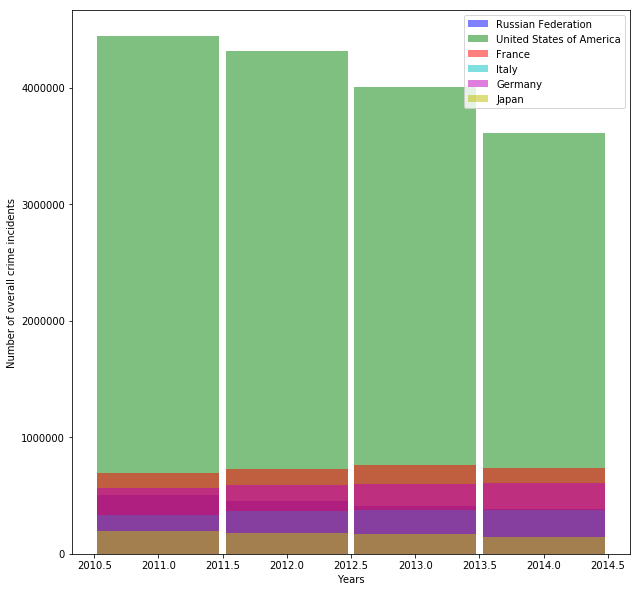

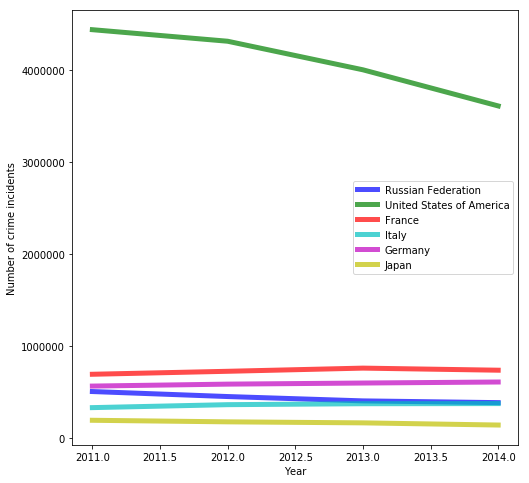

In [48]:
Countries = ['Russian Federation', 'United States of America', 'France', 'Italy', 'Germany', 'Japan']
x = [2011, 2012, 2013, 2014]
pls = []
plt.figure(figsize=(10,10))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
index = 0
for name in Countries:
    pl = plt.bar(x, max_values[name], width=0.95, alpha=0.5, color=colors[index])
    pls.append(pl)
    index += 1
plt.legend((pls[0][0], pls[1][0],pls[2][0],pls[3][0],pls[4][0],pls[5][0]), (Countries[0], Countries[1], Countries[2], Countries[3], Countries[4], Countries[5]))
plt.ylabel('Number of overall crime incidents')
plt.xlabel('Years')
plt.show()
index = 0
plt.figure(figsize=(8,8))
pls = []
for name in Countries:
    pl = plt.plot(x, max_values[name], linewidth=5.0,alpha=0.7, color=colors[index])
    pls.append(pl)
    index += 1
plt.ylabel('Number of crime incidents')
plt.xlabel('Year')
plt.legend((pls[0][0], pls[1][0],pls[2][0],pls[3][0],pls[4][0],pls[5][0]), (Countries[0], Countries[1], Countries[2], Countries[3], Countries[4], Countries[5]))
plt.show()

**Таким образом, я получил ответ на вопрос о том, сколько же преступлений происходит в различных странах в течение года. Оказалось, что число их в Америке измеряется в нескольких миллионах, а в прочих странах - находится в пределах не более, чем 800 тысяч**

# 2. Далее представлены графики с относительной характеристикой: число совершённых преступлений за год на 100.000 душ населения.

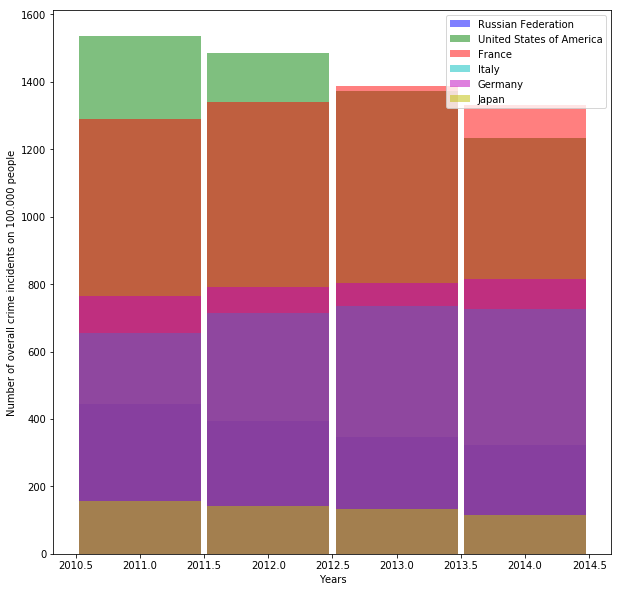

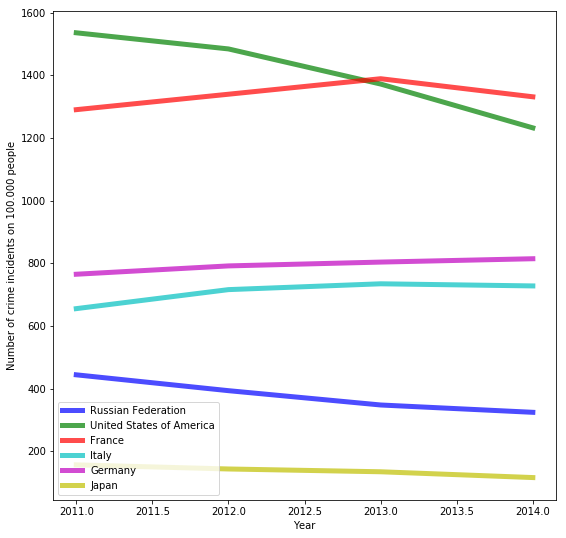

In [110]:
pls = []
plt.figure(figsize=(10,10))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
index = 0
for name in Countries:
    pl = plt.bar(x, max_values_rate[name], width=0.95, alpha=0.5, color=colors[index])
    pls.append(pl)
    index += 1
plt.legend((pls[0][0], pls[1][0],pls[2][0],pls[3][0],pls[4][0],pls[5][0]), (Countries[0], Countries[1], Countries[2], Countries[3], Countries[4], Countries[5]))
plt.ylabel('Number of overall crime incidents on 100.000 people')
plt.xlabel('Years')
plt.show()
index = 0
plt.figure(figsize=(9,9))
pls = []
for name in Countries:
    pl = plt.plot(x, max_values_rate[name], linewidth=5.0,alpha=0.7, color=colors[index])
    pls.append(pl)
    index += 1
plt.ylabel('Number of crime incidents on 100.000 people')
plt.xlabel('Year')
plt.legend((pls[0][0], pls[1][0],pls[2][0],pls[3][0],pls[4][0],pls[5][0]), (Countries[0], Countries[1], Countries[2], Countries[3], Countries[4], Countries[5]))
plt.show()

**Как легко видеть, огромное число преступлений в США объясняется кратной разницей в количестве населения. **
**Тем не менее, вплоть до 2014 года США по-прежнему оставалсь бесспорным лидером по количеству совершённых преступлений в год, даже с учётом большого населения.**

**Россия, к примеру, согласно статистике, стабильно уменьшала криминальные показатели год от года, начиная с и без того небольшого количества преступлений**

**Вполне ожидаемо лидером по условной безопасности стала Япония, поскольку в развитых странах Востока полицейский аппарат и система контроля за гражданами очень хорошо отлажены и с успехом наказывают и предотвращают даже мелкие преступления**

**Наиболее интересный результат показала Франция. Несмотря на хорошее геополитическое положение в центре Европы и лидирующие позиции в экономике и политике ЕС, количество совершённых преступлений на душу населения в этой стране очень велико. **
**Я полагаю, что это связано с навязчивой политикой толерантности и активной иммиграции в этой стране. Множество иммигрантов и беженцев, оказавшись без работы в чужой стране, вполне ожидаемо могут взяться за криминал**

# 3.Самый частый тип преступлений практически во всех странах - грабёж.
# Сравнение числа ограблений за 2014 год.

**Как мы легко можем заметить, проанализировав данные, самым частым преступлением является банальное ограбление человека. Сюда входят, как и мелкие карманные кражи, так и вооруженные нападения **


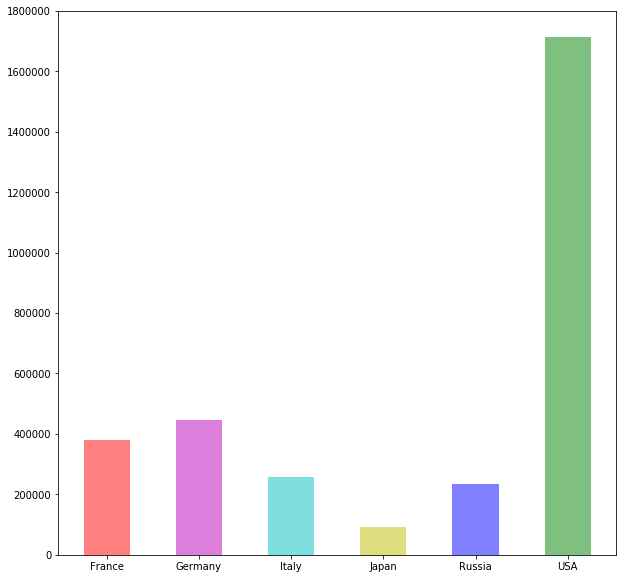

Russian Federation  -  Burglary
United States of America  -  Burglary
France  -  Burglary
Italy  -  Burglary and housebraking
Germany  -  Burglary
Japan  -  Burglary


In [53]:
count = []
for name in Countries:
    count.append(float(frequency[name][0][1]))
plt.figure(figsize=(10,10))
C = Countries.copy()
C[0] = 'Russia'
C[1] = 'USA'
plt.bar(C, count, width=0.5, alpha=0.5, color=colors)
plt.show()
for name in Countries:
    print(name, ' - ', frequency[name][0][0])

**Здесь стоит отметить, что Италия - единственная страна, где грабежей домов и имущества больше, чем ограблений самих людей. Как бы там ни было, оба показателя, тем не менее, держатся на достаточно низком, относительно других крупных стран ЕС, уровне.**

**Соединённые Штаты Америки по-прежнему держатся на первом месте с огромным отрывом от всех стран. Видно, что даже в сумме остальные государства едва ли смогут составить ей "конкуренцию" в этом рейтинге.**

**Это вполне ожидаемый результат, поскольку грабежи в Америке - одна из самых больших проблем местных властей. Их происходит огромное число во всех районах и городах. Во многом это связано с проблемной социальной ситуацией с афроамериканцами и их криминальными группировками, а так же со свободной продажей оружия для всех граждан. В свете этого абсолютно любой человек может приобрести пистолет и пойти грабить прохожих в ночное время**

# 4. Рассмотрим самые частые типы преступлений в США и России и сравним показатели.

**Чтобы быть более объективными, будем рассматривать относительные криминальные показатели, т.е. количество преступлений на 100.00 душ населения**

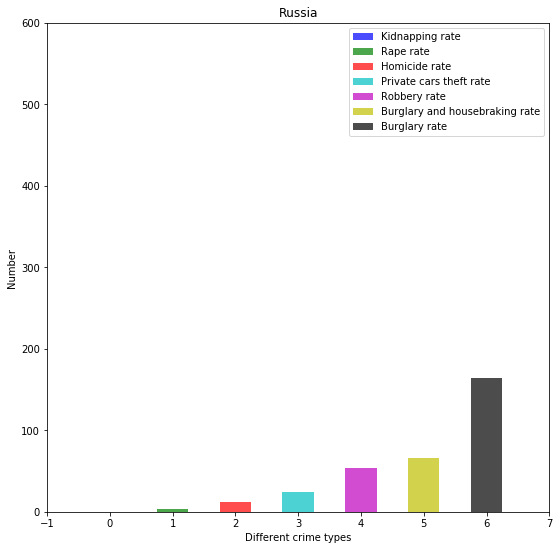

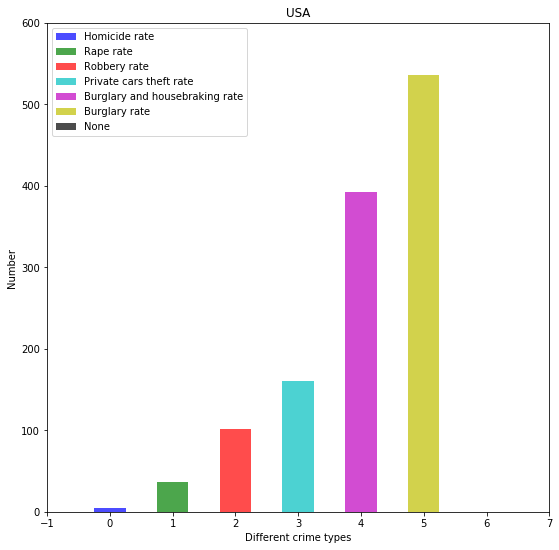

In [123]:
def keys(a):
    return float(a[1])
Russia_top = top_crime['Russian Federation'].copy()
Russia_top.sort(key=keys)
USA_top = top_crime['United States of America'].copy()
USA_top.sort(key=keys)

X1 = []
Y1 = []
X2 = []
Y2 = []
for elem in Russia_top:
    X1.append(elem[0])
    Y1.append(float(elem[1]))
for elem in USA_top:
    X2.append(elem[0])
    Y2.append(float(elem[1]))
X_1 = np.arange(7)
plt.figure(figsize=(9,9))
axes = plt.gca()
axes.set_ylim([0,600])
axes.set_xlim([-1,7])
cols = plt.bar(X_1, Y1, width=0.5, alpha=0.7, color=colors, axes=axes)
plt.legend(cols, X1)
plt.title('Russia')
plt.xlabel('Different crime types')
plt.ylabel('Number')
plt.show()
Y2.append(0)
X2.append('None')
X_2 = np.arange(7)
plt.figure(figsize=(9,9))
plt.title('USA')
axes = plt.gca()
axes.set_ylim([0,600])
axes.set_xlim([-1,7])
cols = plt.bar(X_2, Y2, width=0.5, alpha=0.7, color=colors, axes=axes)
plt.xlabel('Different crime types')
plt.ylabel('Number')
plt.legend(cols, X2)
plt.show()

**Как легко заметить, в целом самые часто встречающиеся престуления совпадают в этих двух странах, это объясняется их менее тяжким характером и широким распространением среди всех регионов и слоёв населения.**
**Интересным оказался тот факт, что несмотря на все, казалось бы, серьёзные проблемы с преступностью, Россия по всем параметрам многократно превосходит США в лучшую сторону. Связано ли это с особенностями официальной отчётности или с действительно кардинально разными положениями дел в этих странах, мы предполагать не будем. Но численные факты остаются фактами.**


# Промежуточное заключение


**В итоге я получил ответы на 4 основных вопроса проекта. И даже на небольшой выборке самых популярных и развитых стран, получил интересные результаты касаемо общей динамики и качественных характеристик криминальной обстановки.**